In [ ]:
!pip install ipython==7.34.0 ipykernel==5.5.6
!pip install import_ipynb

In [2]:
import numpy as np
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/Physics-Informed Neural Networks/Demo/fenics_cfd/neural_network'
os.chdir(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Device {device}')
if device.type == 'cuda':
  print(torch.cuda.get_device_name())
  torch.cuda.empty_cache()
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:128"

from data_processing import FlowFieldDataset, train_test_split
from nn_modules import SuperResolutionPICNN
from model_utils import train_model, test_model, evaluate_model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Device cuda
Tesla T4


In [4]:
npy_velocity_dir = '/content/drive/MyDrive/Colab Notebooks/Physics-Informed Neural Networks/Demo/fenics_cfd/blood_flow_simulations/velocity_fields/npy_data'
npy_pressure_dir = '/content/drive/MyDrive/Colab Notebooks/Physics-Informed Neural Networks/Demo/fenics_cfd/blood_flow_simulations/pressure_fields/npy_data'

dataset = FlowFieldDataset(npy_velocity_dir, npy_pressure_dir)
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)

In [5]:
batch_size = 1
num_epochs = 1

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

hidden_layers = np.array([16, 32, 16])
model = SuperResolutionPICNN(hidden_layers).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
criterion = torch.nn.MSELoss()
alpha = 0.5

save_path = '/content/drive/MyDrive/Colab Notebooks/Physics-Informed Neural Networks/Demo/fenics_cfd/neural_network/model_parameters'

In [6]:
data_losses, physics_losses = train_model(model, train_loader, optimizer, criterion, num_epochs, device, alpha, save_path, is_physics_informed=True)

Epoch [1/1], Step [10/1632], Loss: 47.652232
Physics Loss: 94.563164
Epoch [1/1], Step [20/1632], Loss: 5.697053
Physics Loss: 11.039665
Epoch [1/1], Step [30/1632], Loss: 1.519638
Physics Loss: 2.656018
Epoch [1/1], Step [40/1632], Loss: 1.246107
Physics Loss: 2.318301
Epoch [1/1], Step [50/1632], Loss: 0.836460
Physics Loss: 1.490931
Epoch [1/1], Step [60/1632], Loss: 0.701061
Physics Loss: 1.045410
Epoch [1/1], Step [70/1632], Loss: 0.594943
Physics Loss: 1.072821
Epoch [1/1], Step [80/1632], Loss: 0.992158
Physics Loss: 1.139624
Epoch [1/1], Step [90/1632], Loss: 1.128649
Physics Loss: 0.938069
Epoch [1/1], Step [100/1632], Loss: 0.467898
Physics Loss: 0.705319
Epoch [1/1], Step [110/1632], Loss: 0.389558
Physics Loss: 0.653379
Epoch [1/1], Step [120/1632], Loss: 0.346968
Physics Loss: 0.567963
Epoch [1/1], Step [130/1632], Loss: 1.052994
Physics Loss: 1.949573
Epoch [1/1], Step [140/1632], Loss: 0.343676
Physics Loss: 0.601785
Epoch [1/1], Step [150/1632], Loss: 0.456699
Physics L

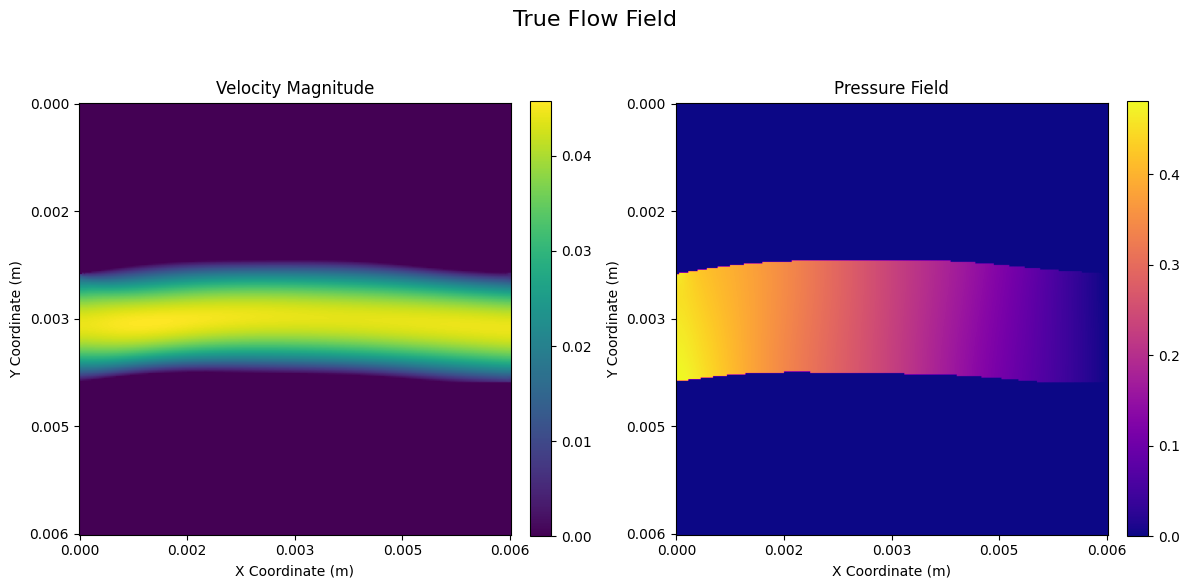

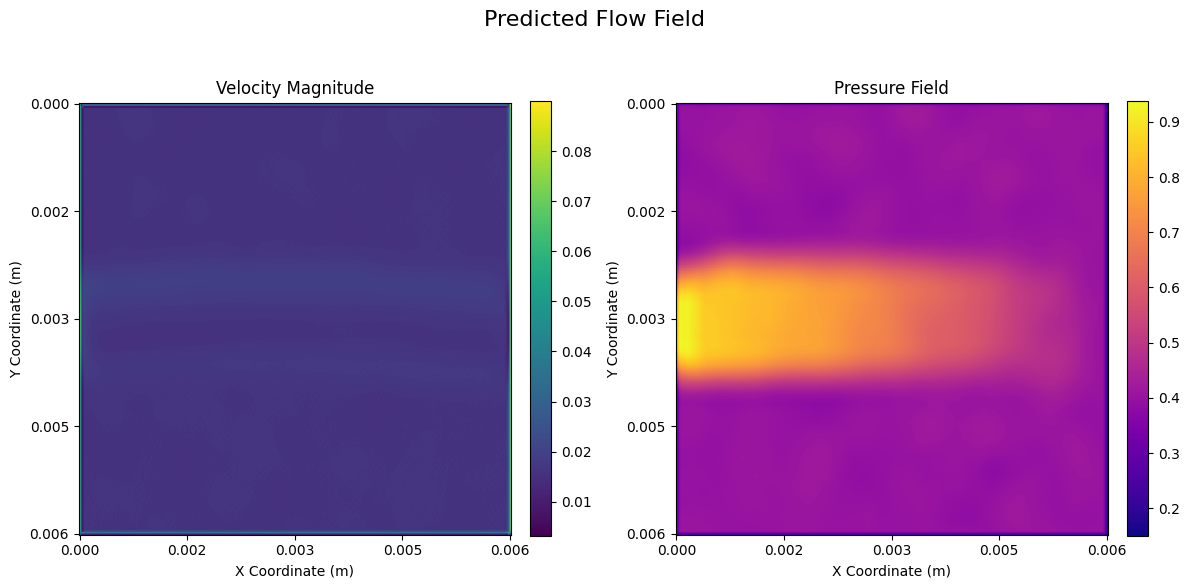

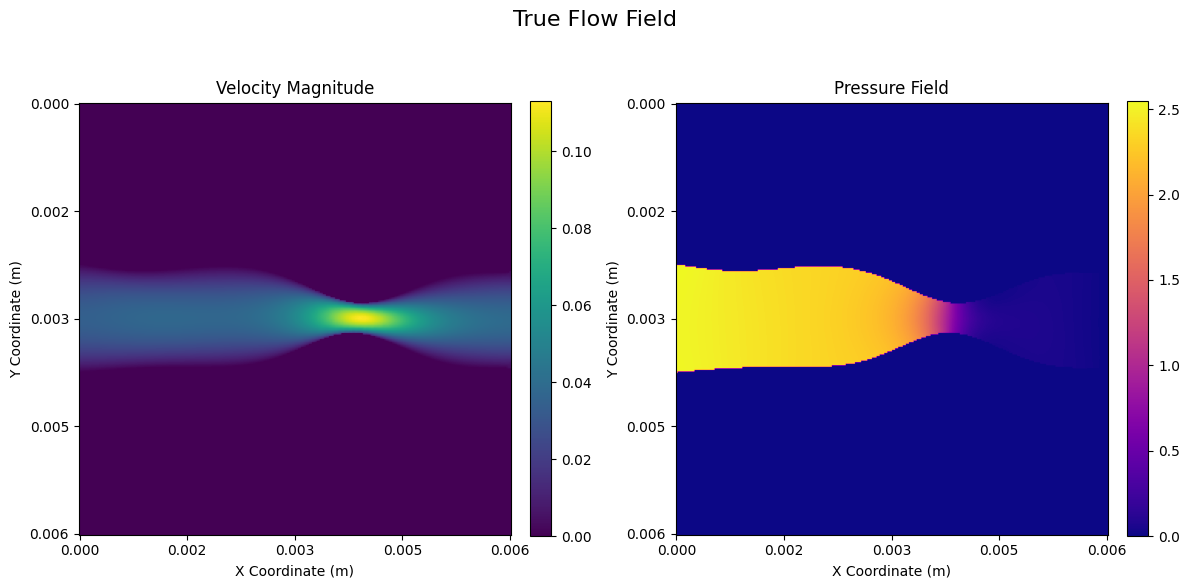

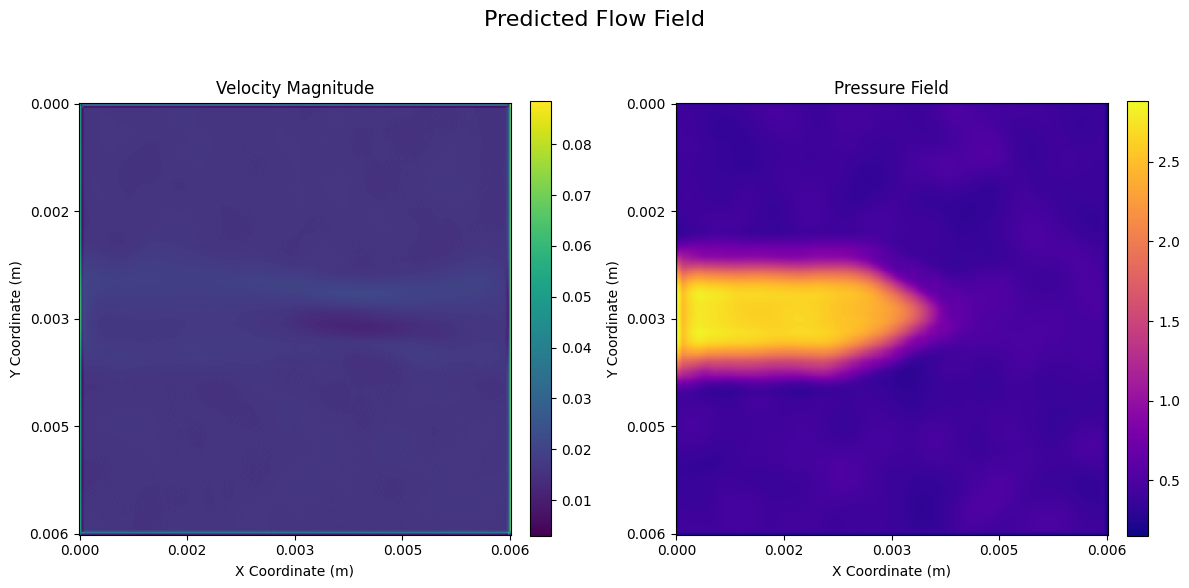

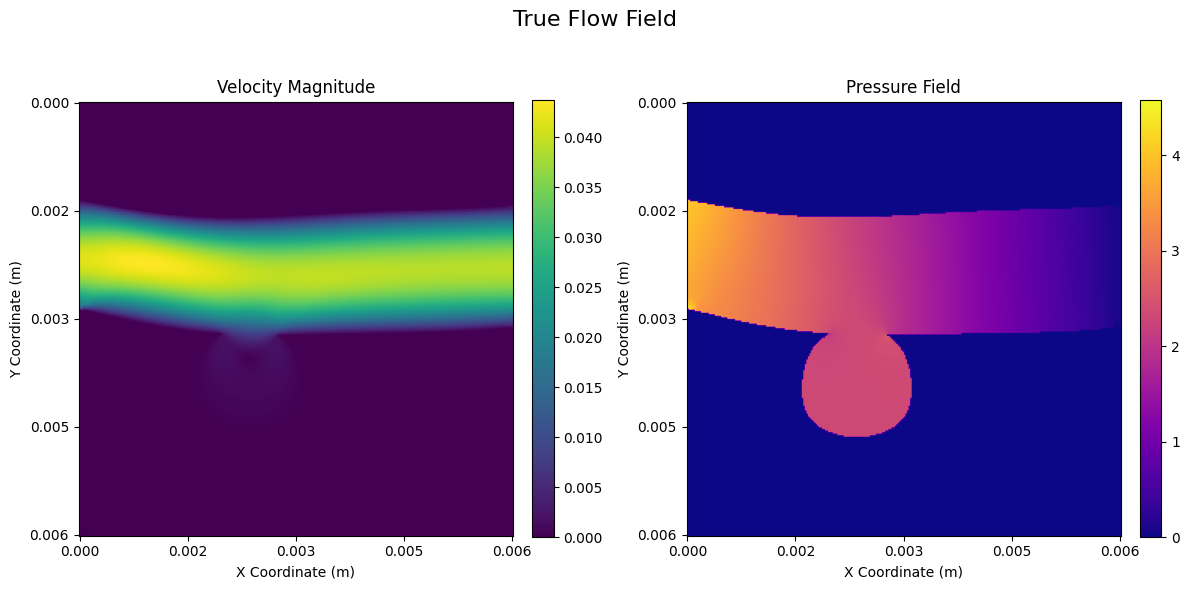

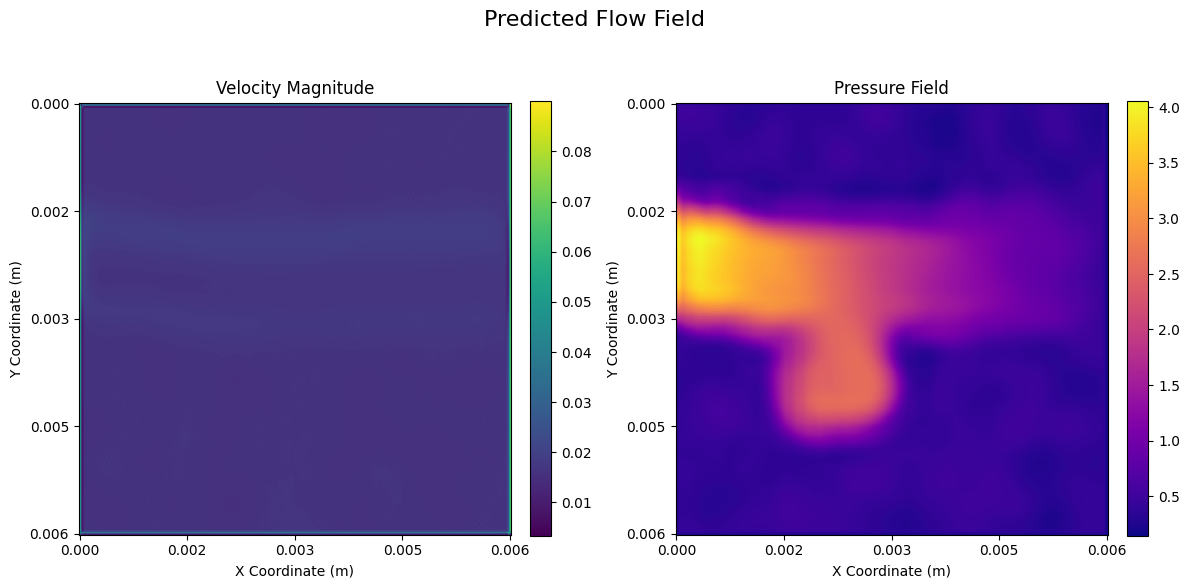

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a5c750d7490>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1442, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.10/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/usr/lib/python3.10/selectors.py", line 416, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt: 

KeyboardInterrupt



In [7]:
avg_loss, results = test_model(model, test_loader, criterion, device, num_visualizations=3, is_physics_informed=True)

In [ ]:
evaluate_model(model, test_loader, device, is_physics_informed=True)